In this project we will analyze the per capita evolution of the GDP of Brazilian states

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
Project = pd.read_excel('Data_Pib_Brazil.xlsx')
Project.head()

,Territorialidades,Ano,PIB per capita
0,Brasil,2013,22.20
1,Acre,2013,12.37
2,Alagoas,2013,9.45
3,Amapá,2013,14.53
4,Amazonas,2013,18.25


In [3]:
Project.shape

(112, 3)

In [4]:
Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Territorialidades  112 non-null    object 
 1   Ano                112 non-null    int64  
 2   PIB per capita     112 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ KB


In [5]:
Project.isnull().sum()

Territorialidades    0
Ano                  0
PIB per capita       0
dtype: int64

In [6]:
Project.describe()

,Ano,PIB per capita
count,112.000000,112.000000
mean,2014.500000,18.367411
std,1.123059,9.481273
min,2013.000000,8.140000
25%,2013.750000,11.647500
50%,2014.500000,14.850000
75%,2015.250000,23.727500
max,2016.000000,54.480000


In [7]:
Project['Territorialidades'].unique()

array(['Brasil', 'Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso do Sul', 'Mato Grosso', 'Minas Gerais', 'Paraíba',
       'Paraná', 'Pará', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
      dtype=object)

In [8]:
Project['Territorialidades'].nunique()

28

In [9]:
Project = Project.rename(columns={'Territorialidades': 'Territorialities', 'Ano':'Year', 'PIB per capita':'Per capita GDP'})
Project.head()

,Territorialities,Year,Per capita GDP
0,Brasil,2013,22.20
1,Acre,2013,12.37
2,Alagoas,2013,9.45
3,Amapá,2013,14.53
4,Amazonas,2013,18.25


In [10]:
Project.groupby(by=['Territorialities', 'Year']).mean()

Per capita GDP
Territorialities Year                
Acre             2013           12.37
                 2014           13.41
                 2015           12.24
                 2016           11.18
Alagoas          2013            9.45
...                               ...
São Paulo        2016           30.24
Tocantins        2013           13.47
                 2014           13.77
                 2015           13.79
                 2016           13.68

[112 rows x 1 columns]

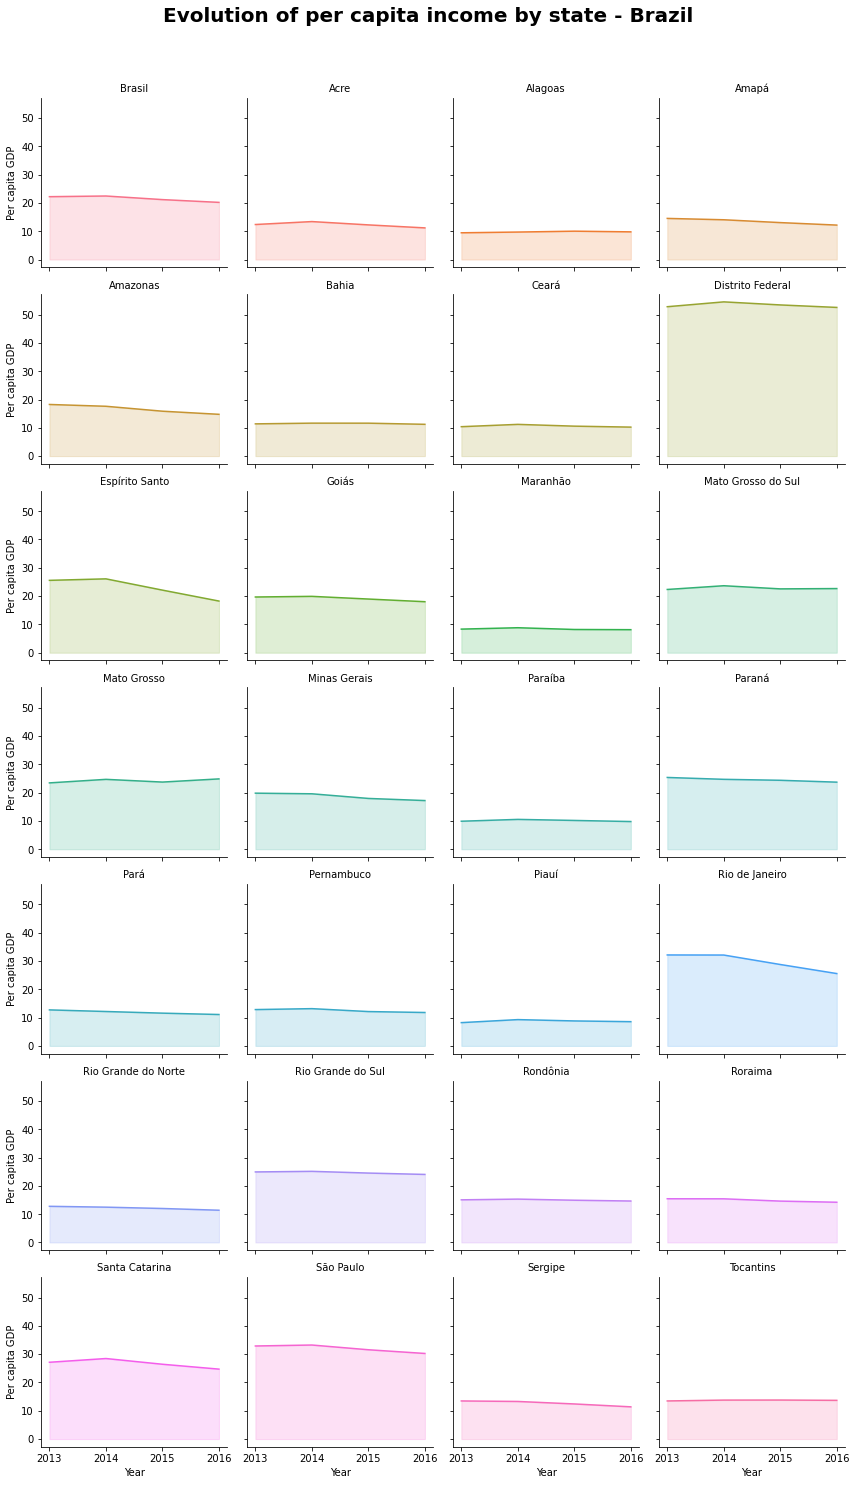

In [11]:
# Sistema de Grids

# Cor Fundo de Fundo
#Background_color = '#f5f5f5'

# Criar o sistema de Grids
Grid_Grafic = sns.FacetGrid( Project, col='Territorialities', hue='Territorialities', col_wrap=4 )

Grid_Grafic = Grid_Grafic.map( plt.plot, 'Year', 'Per capita GDP')

Grid_Grafic = Grid_Grafic.map( plt.fill_between,  'Year', 'Per capita GDP', alpha=0.2).set_titles('{col_name} Territorialities')

Grid_Grafic = Grid_Grafic.set_titles('{col_name}')

Grid_Grafic = Grid_Grafic.fig.suptitle(
    'Evolution of per capita income by state - Brazil',
    fontsize=20, fontweight=600
)

plt.subplots_adjust( top=0.92 )